# Elliott Walker Assignment 5

Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [7]:
diabetes_train |>glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 6, 10,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 0, 0, …
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [8]:
diabetes_test |>glimpse()

Rows: 192
Columns: 9
$ Pregnancies              <dbl> 0, 5, 3, 9, 9, 5, 7, 0, 0, 0, 5, 1, 2, 2, 15,…
$ Glucose                  <dbl> 137, 109, 88, 102, 171, 88, 150, 100, 146, 10…
$ BloodPressure            <dbl> 40, 75, 58, 76, 110, 66, 66, 88, 82, 64, 62, …
$ SkinThickness            <dbl> 35, 26, 11, 37, 24, 21, 42, 60, 0, 41, 0, 20,…
$ Insulin                  <dbl> 168, 0, 54, 0, 240, 23, 342, 110, 0, 142, 0, …
$ BMI                      <dbl> 43.1, 36.0, 24.8, 32.9, 45.4, 24.4, 34.7, 46.…
$ DiabetesPedigreeFunction <dbl> 2.288, 0.546, 0.267, 0.665, 0.721, 0.342, 0.7…
$ Age                      <dbl> 33, 60, 22, 46, 54, 30, 42, 31, 44, 22, 36, 2…
$ Outcome                  <fct> 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

it seems like the `Outcome` column would be the best

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test      |
| BMI         | Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

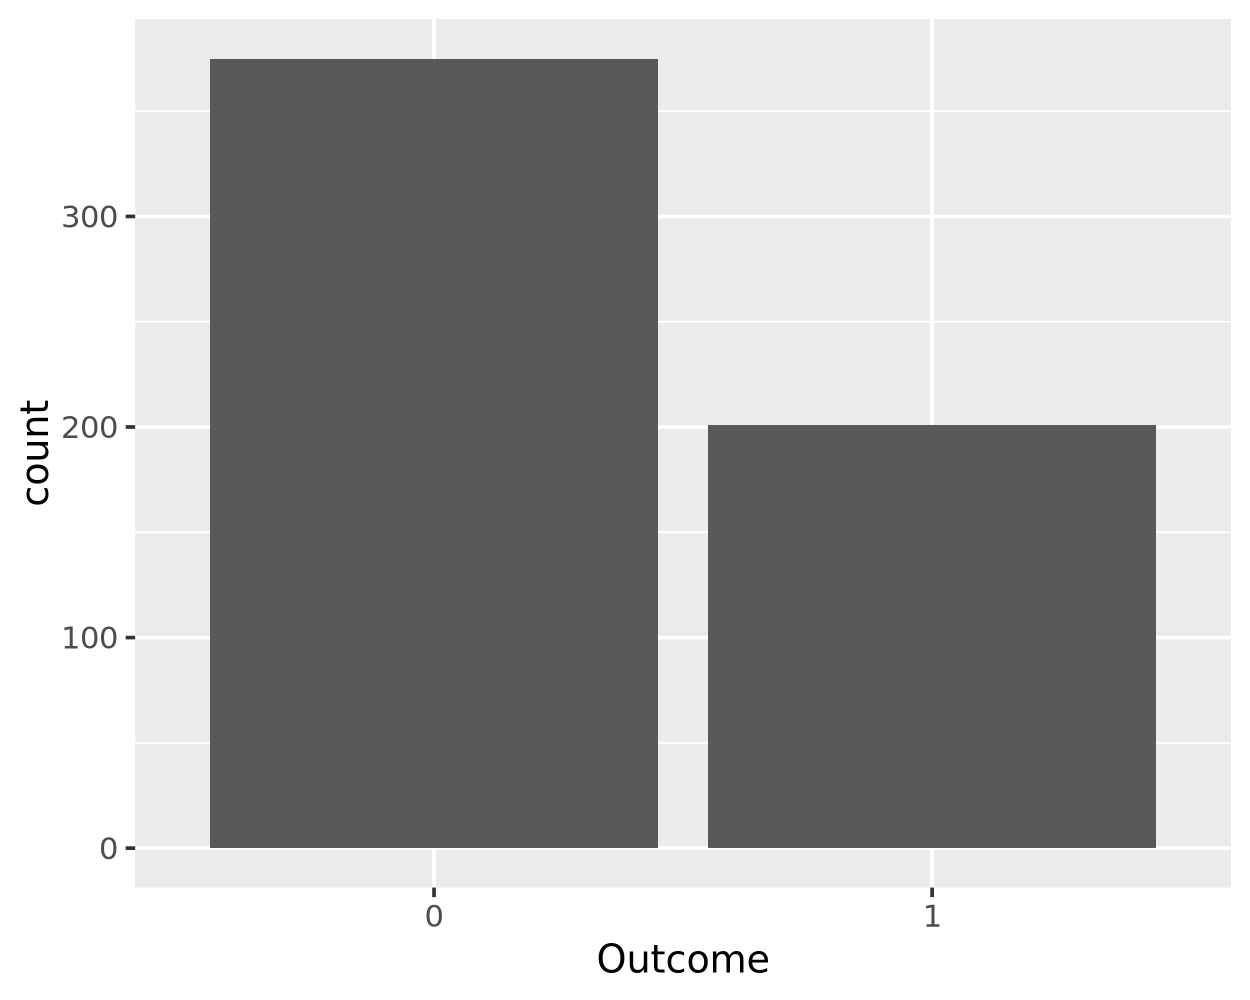

In [13]:
diabetes_train |> ggplot(aes(x=Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

Not balanced -- outcome `0` is approxamately 2x outcome `1`



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [14]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

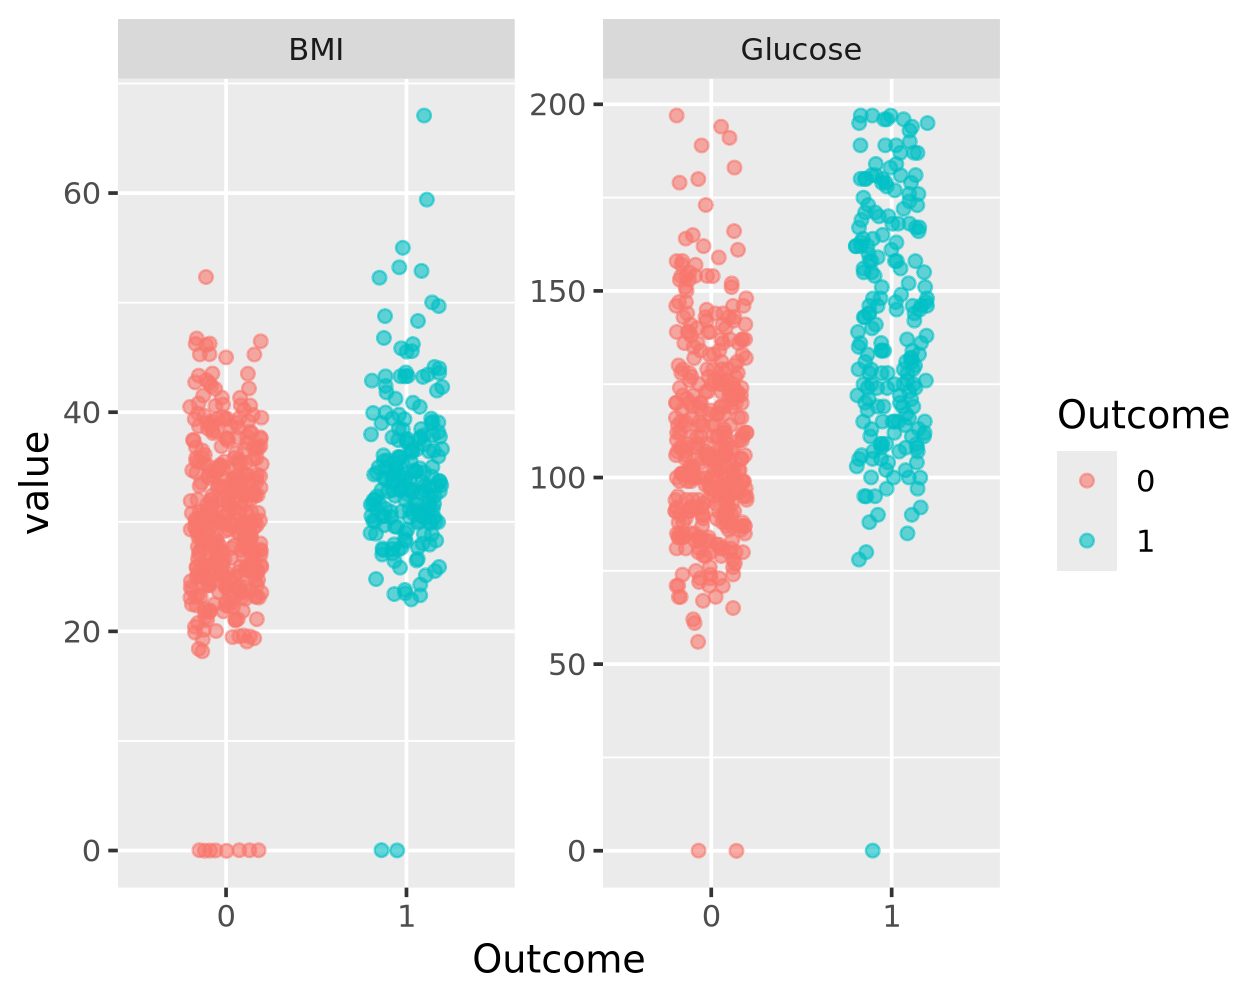

In [50]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.6) + 
  facet_wrap(~name, ncol = 2, scales = 'free_y')


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

## Note
I think you might have meant to have this say `scales = free_y`. it looks cleaner this way!


## Answer:
without specifying the "free_x/y" scale, the two (now seperate) plots will use the same scale. The result of this is that values might look compressed if the scales are diffferent. using "free_x/y" will allow the plots to scale themselves in a more ergonomic way.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [56]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)
mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.15235      0.07022      0.03421  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 588.6 	AIC: 594.6

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [66]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)
diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.3634625,0.63653746,0,137,40,35,168,43.1,2.288,33,1
0,0.7101193,0.28988072,5,109,75,26,0,36.0,0.546,60,0
0,0.9168853,0.08311467,3,88,58,11,54,24.8,0.267,22,0
0,0.7946342,0.20536578,9,102,76,37,0,32.9,0.665,46,1
1,0.1318306,0.86816945,9,171,110,24,240,45.4,0.721,54,1
0,0.9190010,0.08099905,5,88,66,21,23,24.4,0.342,30,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [59]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  27
         1  16  40

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

A) Individuals with diabetes are indicated with `Outcome == 1`. According to our confusion matrix, `67` patients actually have diabetes. (Truth == 1 --> (27 + 40) --> **67** )

B) Of the 67 that actually have diabetes, our model successfully predicted `40` of them ( (Prediction == 1 & Truth == 1 ) --> **40**) 

C) `16` patients were predicted to have diabetes that didn't actually have diabetes. ( (Prediction == 1 & Truth == 0) --> **16**)
